In [2]:
import pandas as pd
import os
import re
import simpy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns  # Para mejorar la apariencia de las gráficas

In [11]:
# ruta de archivos
files = os.listdir("c:\\archivos\proyecto")
os.chdir(r'C:\archivos\proyecto')

if not os.path.exists('Errores'):
    os.makedirs('Errores')

if not os.path.exists('Buenos'):
    os.mkdir('Buenos')

df_total = pd.read_csv('ind_urgencias_final_2023.txt', sep=';')

# convertir a variables categoricas
df_total['Turnos'] = df_total['Turnos'].astype('category')
df_total['DIA_SEMANA'] = df_total['DIA_SEMANA'].astype('category')
df_total['CENTRO_ATENCION'] = df_total['CENTRO_ATENCION'].astype('category')

# filtros
Mes_nuevo = 4
Centros = 'JT'
dia_desde = 1
dia_hasta = 31

# Aplicar filtros múltiples al DataFrame
df_hearth = df_total[(df_total['MES'] == Mes_nuevo) & (df_total['CENTRO_ATENCION'] == Centros) & (df_total['DIA'] >= dia_desde) & (df_total['DIA'] <= dia_hasta)]
#df_hearth.to_csv('ind_urgencias_final_2023.txt', sep=';', index=False)

In [16]:
df_hearth.info()

<class 'pandas.core.frame.DataFrame'>
Index: 329 entries, 14959 to 49545
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   FECHA_LLEGADA              329 non-null    object  
 1   FECHA_TRIAGE               329 non-null    object  
 2   FECHA_INGRESO              329 non-null    object  
 3   FECHA_ATENCION             329 non-null    object  
 4   TIEMPO_DGTURNO_A_TRIAGE    329 non-null    object  
 5   TIEMPO_TRIAGE_A_INGRESO    329 non-null    object  
 6   TIEMPO_INGRESO_A_CONSULTA  329 non-null    object  
 7   TIEMPO_TOTAL               329 non-null    object  
 8   Tiempo_Minutos_Total       329 non-null    object  
 9   CENTRO_ATENCION            329 non-null    category
 10  CLASIFICACION_TRIAGE       329 non-null    int64   
 11  PACIENTE_#_DOCUMENTO       329 non-null    object  
 12  EDAD                       329 non-null    int64   
 13  EDAD_RANGO                 329 non

In [17]:
df_hearth

,FECHA_LLEGADA,FECHA_TRIAGE,FECHA_INGRESO,FECHA_ATENCION,TIEMPO_DGTURNO_A_TRIAGE,TIEMPO_TRIAGE_A_INGRESO,TIEMPO_INGRESO_A_CONSULTA,TIEMPO_TOTAL,Tiempo_Minutos_Total,CENTRO_ATENCION,...,RÉGIMEN PACIENTE,NOMBRE_ENTIDAD,MEDICO,AÑO,MES,DIA_SEMANA,HOUR,Turnos,TIME,DIA
14959,2023-04-01 08:35:51.963,2023-04-01 09:08:17.430,2023-04-01 09:09:41.733,2023-04-01 10:10:18.230,0:32:26,0:01:24,1:00:37,1:34:27,"94,45",JT,...,CONTRIBUTIVO,EPSC34,10763,2023,4,SABADO,8,MAÑANA,2023-04-01 08:35:51.963,1
15063,2023-04-01 12:54:41.983,2023-04-01 13:25:24.897,2023-04-01 13:25:35.010,2023-04-01 13:46:57.037,0:30:43,0:00:11,0:21:22,0:52:16,"52,27",JT,...,SUBSIDIADO,EPSS10,11040,2023,4,SABADO,12,MAÑANA,2023-04-01 12:54:41.983,1
15110,2023-04-02 06:05:46.703,2023-04-02 06:23:11.077,2023-04-02 06:23:58.850,2023-04-02 07:16:28.273,0:17:25,0:00:47,0:52:30,1:10:42,"70,70",JT,...,SUBSIDIADO,EPSC34,9705,2023,4,DOMINGO,6,NOCHE,2023-04-02 06:05:46.703,2
15158,2023-04-02 08:29:50.517,2023-04-02 08:34:36.263,2023-04-02 08:38:36.257,2023-04-02 09:27:41.437,0:04:46,0:04:00,0:49:05,0:57:51,"57,85",JT,...,SUBSIDIADO,EPSC34,5255,2023,4,DOMINGO,8,MAÑANA,2023-04-02 08:29:50.517,2
15319,2023-04-02 16:30:51.517,2023-04-02 16:59:33.493,2023-04-02 17:18:34.363,2023-04-02 17:58:48.950,0:28:42,0:19:01,0:40:14,1:27:57,"87,95",JT,...,CONTRIBUTIVO,EPS002,11040,2023,4,DOMINGO,16,TARDE,2023-04-02 16:30:51.517,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48654,2023-04-28 08:32:59.630,2023-04-28 08:59:13.710,2023-04-28 09:07:03.430,2023-04-28 09:27:30.830,0:26:14,0:07:50,0:20:27,0:54:31,"54,52",JT,...,SUBSIDIADO,EPSC34,11040,2023,4,VIERNES,8,MAÑANA,2023-04-28 08:32:59.630,28
48674,2023-04-28 09:00:08.670,2023-04-28 09:35:01.730,2023-04-28 09:39:46.297,2023-04-28 09:48:17.703,0:34:53,0:04:45,0:08:31,0:48:09,"48,15",JT,...,SUBSIDIADO,EPSC34,10662,2023,4,VIERNES,9,MAÑANA,2023-04-28 09:00:08.670,28
49225,2023-04-29 17:47:19.740,2023-04-29 18:40:28.527,2023-04-29 18:41:21.453,2023-04-29 19:23:08.083,0:53:09,0:00:53,0:41:47,1:35:49,"95,82",JT,...,SUBSIDIADO,EPSC34,10662,2023,4,SABADO,17,TARDE,2023-04-29 17:47:19.740,29
49430,2023-04-30 14:12:59.977,2023-04-30 14:26:59.890,2023-04-30 14:30:58.183,2023-04-30 15:07:48.650,0:14:00,0:03:59,0:36:50,0:54:49,"54,82",JT,...,SUBSIDIADO,EPSC34,10763,2023,4,DOMINGO,14,TARDE,2023-04-30 14:12:59.977,30


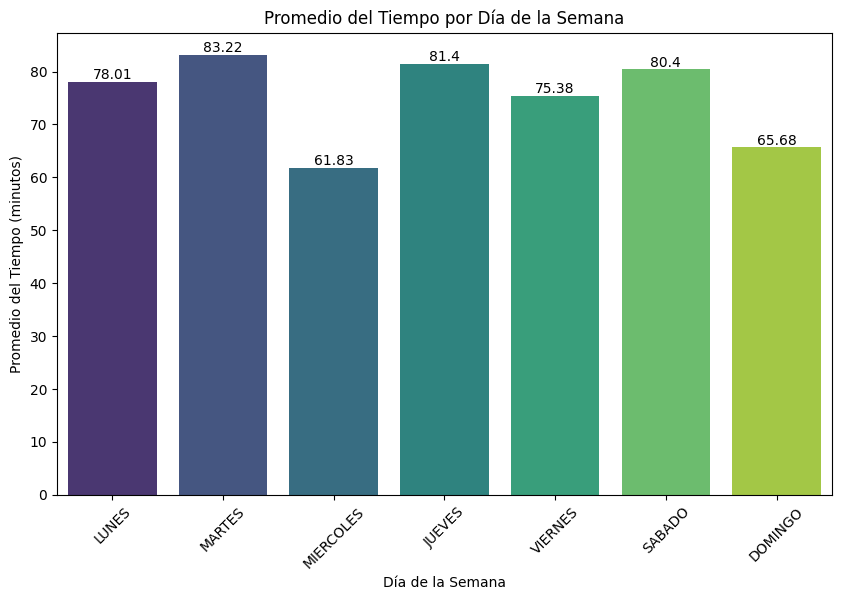

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = df_hearth[['DIA_SEMANA', 'Tiempo_Minutos_Total']].copy()

# Definir el orden deseado de los días de la semana
orden_dias_semana = ['LUNES', 'MARTES', 'MIERCOLES', 'JUEVES', 'VIERNES', 'SABADO', 'DOMINGO']

# Reordenar la columna DIA_SEMANA para que coincida con el orden deseado
df.loc[:, 'DIA_SEMANA'] = pd.Categorical(df['DIA_SEMANA'], categories=orden_dias_semana, ordered=True)


df['Tiempo_Minutos_Total'] = df['Tiempo_Minutos_Total'].str.replace(',', '.', regex=True)
df["Tiempo_Minutos_Total"] = pd.to_numeric(df["Tiempo_Minutos_Total"],errors='coerce')

median = df['Tiempo_Minutos_Total'].median()
df.loc[df['Tiempo_Minutos_Total'] > 420, 'Tiempo_Minutos_Total'] = median

median = df['Tiempo_Minutos_Total'].median()
df.loc[df['Tiempo_Minutos_Total'] < 0, 'Tiempo_Minutos_Total'] = median


# Agrupar por día de la semana y calcular el promedio del Tiempo_total_minutos en cada grupo
promedio_tiempo_por_grupo =df.groupby(['DIA_SEMANA'])['Tiempo_Minutos_Total'].mean().reset_index()

# Renombrar la columna del promedio
promedio_tiempo_por_grupo = promedio_tiempo_por_grupo.rename(columns={'Tiempo_Minutos_Total': 'Promedio_Tiempo'})

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=promedio_tiempo_por_grupo, x='DIA_SEMANA', y='Promedio_Tiempo', palette='viridis')
plt.xlabel('Día de la Semana')
plt.ylabel('Promedio del Tiempo (minutos)')
plt.title('Promedio del Tiempo por Día de la Semana')
plt.xticks(rotation=45)

# Agregar etiquetas en las barras
for index, row in promedio_tiempo_por_grupo.iterrows():
    ax.annotate(str(round(row['Promedio_Tiempo'], 2)), (index, row['Promedio_Tiempo']), ha='center', va='bottom')
plt.show()

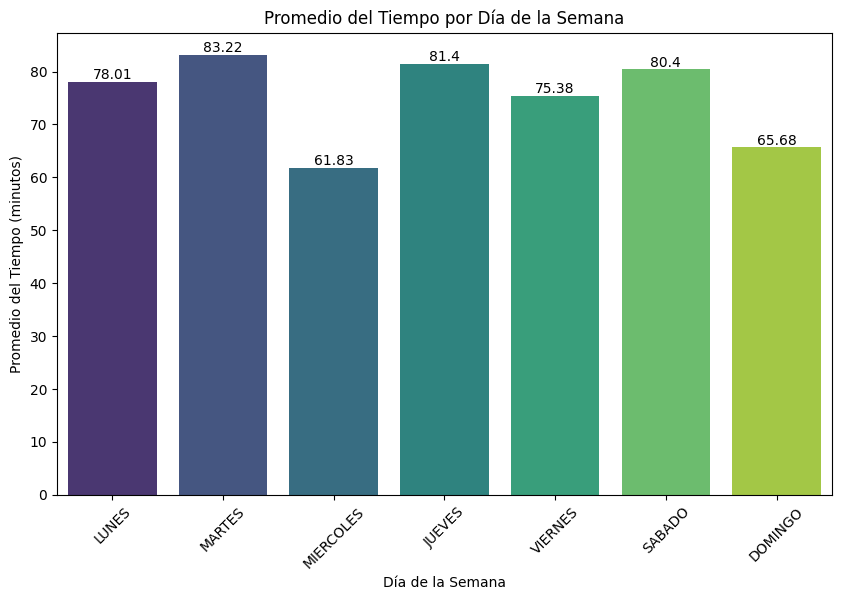

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = df_hearth[['DIA_SEMANA', 'Tiempo_Minutos_Total']].copy()

# Definir el orden deseado de los días de la semana
orden_dias_semana = ['LUNES', 'MARTES', 'MIERCOLES', 'JUEVES', 'VIERNES', 'SABADO', 'DOMINGO']

# Reordenar la columna DIA_SEMANA para que coincida con el orden deseado
df.loc[:, 'DIA_SEMANA'] = pd.Categorical(df['DIA_SEMANA'], categories=orden_dias_semana, ordered=True)

df['Tiempo_Minutos'] = df['Tiempo_Minutos_Total']

df['Tiempo_Minutos'] = df['Tiempo_Minutos'].str.replace(',', '.', regex=True)
df["Tiempo_Minutos"] = pd.to_numeric(df["Tiempo_Minutos"],errors='coerce')

promedio = df['Tiempo_Minutos'].median()
df.loc[df['Tiempo_Minutos'] > 420, 'Tiempo_Minutos'] = promedio
df.loc[df['Tiempo_Minutos'] < 0, 'Tiempo_Minutos'] = promedio

# Agrupar por día de la semana y calcular el promedio del Tiempo_total_minutos en cada grupo
promedio_tiempo_por_grupo =df.groupby(['DIA_SEMANA'])['Tiempo_Minutos'].mean().reset_index()

# Renombrar la columna del promedio
promedio_tiempo_por_grupo = promedio_tiempo_por_grupo.rename(columns={'Tiempo_Minutos': 'Promedio_Tiempo'})

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=promedio_tiempo_por_grupo, x='DIA_SEMANA', y='Promedio_Tiempo', palette='viridis')
plt.xlabel('Día de la Semana')
plt.ylabel('Promedio del Tiempo (minutos)')
plt.title('Promedio del Tiempo por Día de la Semana')
plt.xticks(rotation=45)

# Agregar etiquetas en las barras
for index, row in promedio_tiempo_por_grupo.iterrows():
    ax.annotate(str(round(row['Promedio_Tiempo'], 2)), (index, row['Promedio_Tiempo']), ha='center', va='bottom')
plt.show()

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = df_hearth[['DIA_SEMANA', 'Tiempo_Minutos_Total']].copy()

# Definir el orden deseado de los días de la semana
orden_dias_semana = ['LUNES', 'MARTES', 'MIERCOLES', 'JUEVES', 'VIERNES', 'SABADO', 'DOMINGO']

# Reordenar la columna DIA_SEMANA para que coincida con el orden deseado
df.loc[:, 'DIA_SEMANA'] = pd.Categorical(df['DIA_SEMANA'], categories=orden_dias_semana, ordered=True)

# Convierte todos los valores en la columna 'Tiempo_Minutos_Total' a cadenas
# df['Tiempo_Minutos_Total'] = df['Tiempo_Minutos_Total'].astype(str)

# df['Tiempo_Minutos'] = df['Tiempo_Minutos_Total'].str.replace(',', '.', regex=True)
df["Tiempo_Minutos"] = pd.to_numeric(df["Tiempo_Minutos_Total"],errors='coerce')
df

,DIA_SEMANA,Tiempo_Minutos_Total,Tiempo_Minutos
14959,SABADO,"94,45",NaN
15063,SABADO,"52,27",NaN
15110,DOMINGO,"70,70",NaN
15158,DOMINGO,"57,85",NaN
15319,DOMINGO,"87,95",NaN
...,...,...,...
48654,VIERNES,"54,52",NaN
48674,VIERNES,"48,15",NaN
49225,SABADO,"95,82",NaN
49430,DOMINGO,"54,82",NaN


In [52]:
df["Tiempo_Minutos"] = pd.to_numeric(df["Tiempo_Minutos_Total"],errors='coerce')
df

,DIA_SEMANA,Tiempo_Minutos_Total,Tiempo_Minutos
14959,SABADO,"94,45",NaN
15063,SABADO,"52,27",NaN
15110,DOMINGO,"70,70",NaN
15158,DOMINGO,"57,85",NaN
15319,DOMINGO,"87,95",NaN
...,...,...,...
48654,VIERNES,"54,52",NaN
48674,VIERNES,"48,15",NaN
49225,SABADO,"95,82",NaN
49430,DOMINGO,"54,82",NaN


In [49]:
promedio = df['Tiempo_Minutos'].median()
df.loc[df['Tiempo_Minutos'] > 420, 'Tiempo_Minutos'] = promedio
df.loc[df['Tiempo_Minutos'] < 0, 'Tiempo_Minutos'] = promedio

TypeError: '>' not supported between instances of 'str' and 'int'

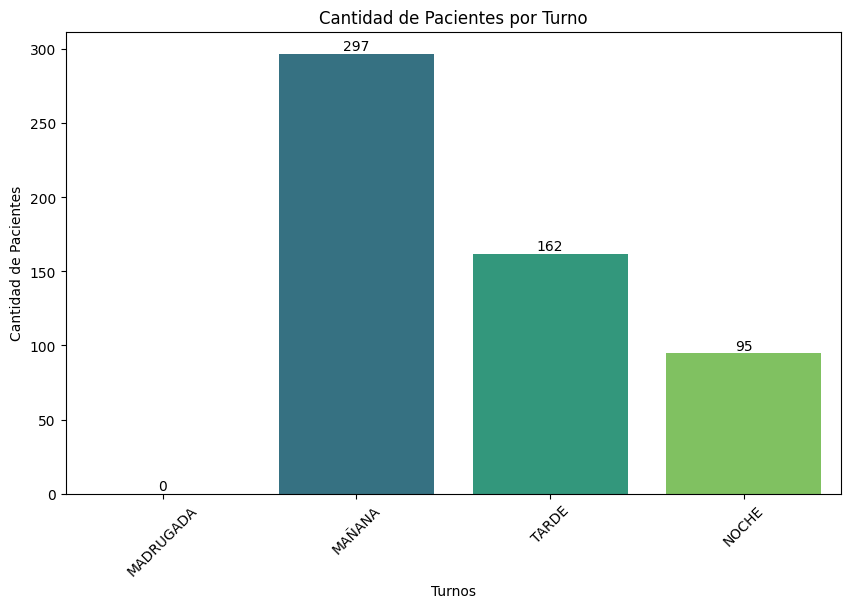

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [6]:
# Grafica de Turnos
# Definir el orden deseado de los Turnos
orden_turnos = ['MADRUGADA', 'MAÑANA', 'TARDE', 'NOCHE']

# Reordenar la columna DIA_SEMANA para que coincida con el orden deseado
df_hearth.loc[:, 'Turnos'] = pd.Categorical(df_hearth['Turnos'], categories=orden_turnos, ordered=True)

# Agrupar por turno y contar la cantidad de pacientes en cada grupo
pacientes_por_grupo1 = df_hearth.groupby(['Turnos'])['PACIENTE_#_DOCUMENTO'].count().reset_index()
#pacientes_por_grupo = df_hearth.groupby(['DIA_SEMANA', 'Turnos', 'EDAD_RANGO'])['PACIENTE_#_DOCUMENTO'].count().reset_index()

# Renombrar la columna de conteo
pacientes_por_grupo1 = pacientes_por_grupo1.rename(columns={'PACIENTE_#_DOCUMENTO': 'Cantidad_Pacientes'})

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=pacientes_por_grupo1, x='Turnos', y='Cantidad_Pacientes', palette='viridis')
plt.xlabel('Turnos')
plt.ylabel('Cantidad de Pacientes')
plt.title('Cantidad de Pacientes por Turno')
plt.xticks(rotation=45)

# Agregar etiquetas en las barras
for index, row in pacientes_por_grupo1.iterrows():
    ax.annotate(str(row['Cantidad_Pacientes']), (index, row['Cantidad_Pacientes']), ha='center', va='bottom')
plt.show()

tiempo_real = sum(df_hearth['Tiempo_Minutos_Total'])
pacientes_total = df_hearth['PACIENTE_#_DOCUMENTO'].count()
tiempo_promedio_espera_mes = tiempo_real / pacientes_total if pacientes_total > 0 else 0
print("Datos Reales (historicos):")
print(f"Tiempo Real: {tiempo_real} pacientes por mes")
print(f"Total pacientes: {pacientes_total} pacientes por mes")
print(f"Tiempo de Espera Promedio: {tiempo_promedio_espera_mes} ")

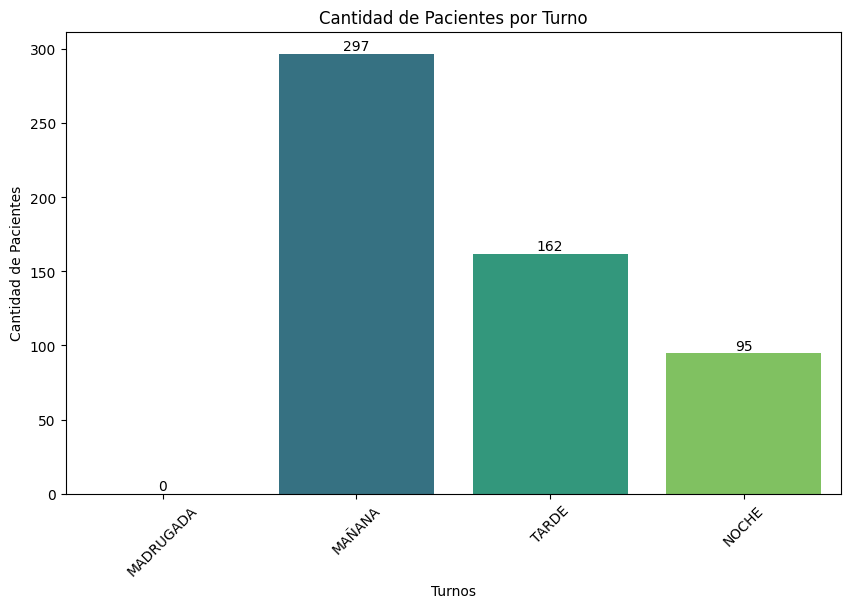

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [9]:
# Grafica de Turnos
# Definir el orden deseado de los Turnos
orden_turnos = ['MADRUGADA', 'MAÑANA', 'TARDE', 'NOCHE']

# Reordenar la columna DIA_SEMANA para que coincida con el orden deseado
df_hearth.loc[:, 'Turnos'] = pd.Categorical(df_hearth['Turnos'], categories=orden_turnos, ordered=True)

# Agrupar por turno y contar la cantidad de pacientes en cada grupo
pacientes_por_grupo1 = df_hearth.groupby(['Turnos'])['PACIENTE_#_DOCUMENTO'].count().reset_index()
#pacientes_por_grupo = df_hearth.groupby(['DIA_SEMANA', 'Turnos', 'EDAD_RANGO'])['PACIENTE_#_DOCUMENTO'].count().reset_index()

# Renombrar la columna de conteo
pacientes_por_grupo1 = pacientes_por_grupo1.rename(columns={'PACIENTE_#_DOCUMENTO': 'Cantidad_Pacientes'})

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=pacientes_por_grupo1, x='Turnos', y='Cantidad_Pacientes', palette='viridis')
plt.xlabel('Turnos')
plt.ylabel('Cantidad de Pacientes')
plt.title('Cantidad de Pacientes por Turno')
plt.xticks(rotation=45)

# Agregar etiquetas en las barras
for index, row in pacientes_por_grupo1.iterrows():
    ax.annotate(str(row['Cantidad_Pacientes']), (index, row['Cantidad_Pacientes']), ha='center', va='bottom')
plt.show()

tiempo_real = sum(df_hearth['Tiempo_Minutos_Total'])
pacientes_total = df_hearth['PACIENTE_#_DOCUMENTO'].count()
tiempo_promedio_espera_mes = tiempo_real / pacientes_total if pacientes_total > 0 else 0
print("Datos Reales (historicos):")
print(f"Tiempo Real: {tiempo_real} pacientes por mes")
print(f"Total pacientes: {pacientes_total} pacientes por mes")
print(f"Tiempo de Espera Promedio: {tiempo_promedio_espera_mes} ")

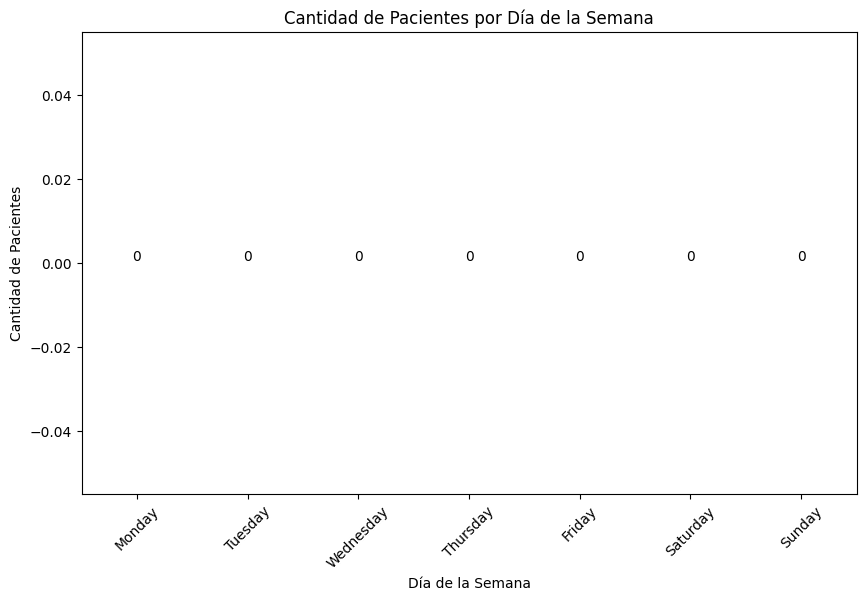

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [8]:
# Grafica de Dia de la Semana
# Definir el orden deseado de los días de la semana
orden_dias_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reordenar la columna DIA_SEMANA para que coincida con el orden deseado
df_hearth.loc[:, 'DIA_SEMANA'] = pd.Categorical(df_hearth['DIA_SEMANA'], categories=orden_dias_semana, ordered=True)

# Agrupar por día de la semana y contar la cantidad de pacientes en cada grupo
pacientes_por_grupo = df_hearth.groupby(['DIA_SEMANA'])['PACIENTE_#_DOCUMENTO'].count().reset_index()

# Renombrar la columna de conteo
pacientes_por_grupo = pacientes_por_grupo.rename(columns={'PACIENTE_#_DOCUMENTO': 'Cantidad_Pacientes'})

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=pacientes_por_grupo, x='DIA_SEMANA', y='Cantidad_Pacientes', palette='viridis')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Pacientes')
plt.title('Cantidad de Pacientes por Día de la Semana')
plt.xticks(rotation=45)

# Agregar etiquetas en las barras
for index, row in pacientes_por_grupo.iterrows():
    ax.annotate(str(row['Cantidad_Pacientes']), (index, row['Cantidad_Pacientes']), ha='center', va='bottom')
plt.show()

tiempo_real = sum(df_hearth['Tiempo_Minutos_Total'])
pacientes_total = df_hearth['PACIENTE_#_DOCUMENTO'].count()
tiempo_promedio_espera_mes = tiempo_real / pacientes_total if pacientes_total > 0 else 0
print("Datos Reales (historicos):")
print(f"Tiempo Real: {tiempo_real} pacientes por mes")
print(f"Total pacientes: {pacientes_total} pacientes por mes")
print(f"Tiempo de Espera Promedio: {tiempo_promedio_espera_mes} ")

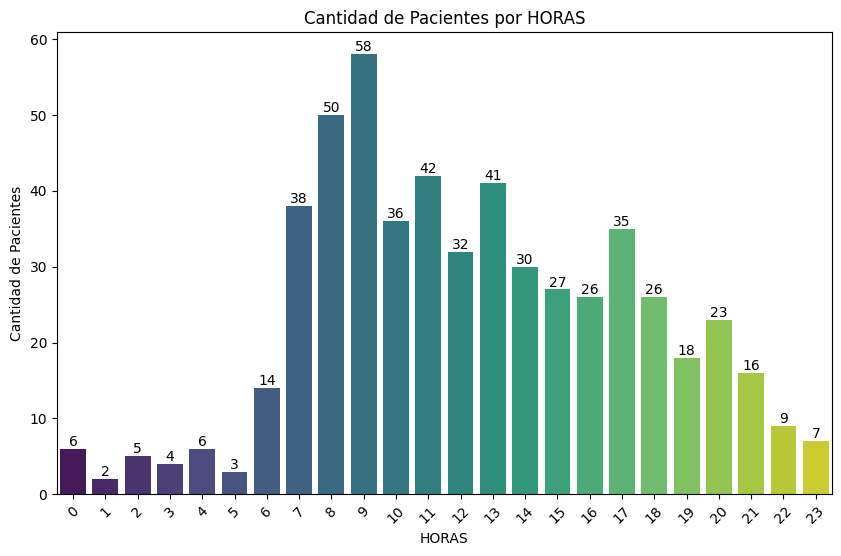

In [10]:
# Agrupar por turno y contar la cantidad de pacientes en cada grupo
pacientes_por_grupo1 = df_hearth.groupby(['HOUR'])['PACIENTE_#_DOCUMENTO'].count().reset_index()

# Renombrar la columna de conteo
pacientes_por_grupo1 = pacientes_por_grupo1.rename(columns={'PACIENTE_#_DOCUMENTO': 'Cantidad_Pacientes'})

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=pacientes_por_grupo1, x='HOUR', y='Cantidad_Pacientes', palette='viridis')
plt.xlabel('HORAS')
plt.ylabel('Cantidad de Pacientes')
plt.title('Cantidad de Pacientes por HORAS')
plt.xticks(rotation=45)

# Agregar etiquetas en las barras
for index, row in pacientes_por_grupo1.iterrows():
    ax.annotate(str(row['Cantidad_Pacientes']), (index, row['Cantidad_Pacientes']), ha='center', va='bottom')

plt.show()

In [104]:
tiempo_real = sum(df_hearth['Tiempo_Minutos_Total'])
pacientes_total = df_hearth['PACIENTE_#_DOCUMENTO'].count()
tiempo_promedio_espera_mes = tiempo_real / pacientes_total if pacientes_total > 0 else 0
print("Datos Reales (historicos):")
print(f"Tiempo Real: {tiempo_real} pacientes por mes")
print(f"Total pacientes: {pacientes_total} pacientes por mes")
print(f"Tiempo de Espera Promedio: {tiempo_promedio_espera_mes} ")

Datos Reales (historicos):
Tiempo Real: 20628.0 pacientes por mes
Total pacientes: 640 pacientes por mes
Tiempo de Espera Promedio: 32.23125 


In [26]:
# prueba 4

# Tasas de llegada y servicio iniciales
tasa_llegada_inicial = 5  # Tasa de llegada promedio de pacientes por hora (λ)
tasa_servicio_inicial = 3  # Tasa de servicio promedio de pacientes por hora (μ)
tasa_llegada = 5  # Tasa de llegada promedio de pacientes por hora (λ)
tasa_servicio = 3  # Tasa de servicio promedio de pacientes por hora (μ)
num_medicos = 4  # Puedes ajustar esto según tus necesidades
tiempo_espera_total = 0
clientes_atendidos = 0
tiempo_simulacion = 24  # Tiempo de simulación en horas

# Parámetros para la proyección
num_simulaciones = 2  # Número de simulaciones a realizar
tasas_llegada_proyectadas = [7, 9, 11]  # Tasas de llegada a probar
tasas_servicio_proyectadas = [5, 7, 9]  # Tasas de servicio a probar

# Listas para almacenar resultados de las simulaciones
resultados_tiempo_espera_promedio = []

# Diccionarios para almacenar métricas por turno y día de la semana
turnos = ['MADRUGADA', 'MAÑANA', 'TARDE', 'NOCHE']  
meses = ['01', '02', '03', '04', '05', '06', '07','08','09','10','11','12']
dias_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
metricas_por_turno = {turno: {'espera': 0, 'atendidos': 0} for turno in turnos}
metricas_por_dia_semana  = {dias: {'espera': 0, 'atendidos': 0} for dias in dias_semana}
metricas_por_mes  = {mes: {'espera': 0, 'atendidos': 0} for mes in meses}

def llegada_paciente(env, medico, turno, dia_semana, mes, centro, clasificacion):
    global tiempo_espera_total, clientes_atendidos, tiempo_real_total
    llegada = np.random.exponential(1 / tasa_llegada)
    yield env.timeout(llegada)
    # print(f"Llegó un paciente a las {env.now:.2f} horas.")
    with medico.request() as req:
        yield req
        tiempo_espera = env.now - llegada
        tiempo_espera_total += tiempo_espera
             # print(f"Paciente atendido a las {env.now:.2f} horas después de esperar {tiempo_espera:.2f} horas.")
        servicio = np.random.exponential(1 / tasa_servicio)
        yield env.timeout(servicio)
        clientes_atendidos += 1
        
        # Actualizar métricas por turno y día de la semana
        metricas_por_turno[turno]['espera'] += tiempo_espera
        metricas_por_turno[turno]['atendidos'] += 1
        metricas_por_dia_semana[dia_semana]['espera'] += tiempo_espera
        metricas_por_dia_semana[dia_semana]['atendidos'] += 1

# Extender el tiempo de simulación a 6 meses (aproximadamente 4320 horas)
tiempo_simulacion_extendido = 4320

# Listas para almacenar resultados de las simulaciones extendidas
resultados_tiempo_espera_promedio_extendido = []

# Realizar simulación extendida
for tasa_llegada_proyectada in tasas_llegada_proyectadas:
    for tasa_servicio_proyectada in tasas_servicio_proyectadas:
        tiempo_espera_promedio_simulaciones = []
        
        for _ in range(num_simulaciones):
            # Configurar la simulación
            env = simpy.Environment()
            medico = simpy.Resource(env, capacity=num_medicos)
            tasa_llegada = tasa_llegada_proyectada
            tasa_servicio = tasa_servicio_proyectada
            tiempo_espera_total = 0
            clientes_atendidos = 0

            # Llamar a llegada_paciente para cada fila del DataFrame
            for index, row in df_hearth.iterrows():
                turno = row['Turnos']
                dia_semana = row['DIA_SEMANA']
                mes = row['MES']
                centro = row['CENTRO_ATENCION']
                clasificacion = row['CLASIFICACION_TRIAGE']
                env.process(llegada_paciente(env, medico, turno, dia_semana, mes, centro, clasificacion))

            # Configurar tiempo de simulación basado en tus datos
            tiempo_simulacion = df_hearth['Tiempo_Minutos_Total'].max() + 60
            tiempo_real = df_hearth['Tiempo_Minutos_Total']

            # Configurar tiempo de simulación extendido
#            env.run(until=tiempo_simulacion_extendido)
            env.run(until=tiempo_simulacion)

            # Calcular métricas
            tiempo_promedio_espera = tiempo_espera_total / clientes_atendidos if clientes_atendidos > 0 else 0
            tiempo_espera_promedio_simulaciones.append(tiempo_promedio_espera)

        # Calcular el promedio de tiempo de espera de todas las simulaciones extendidas
        tiempo_espera_promedio = sum(tiempo_espera_promedio_simulaciones) / num_simulaciones
        tiempo_espera_promedio_extendido = sum(tiempo_espera_promedio_simulaciones) / num_simulaciones
        resultados_tiempo_espera_promedio_extendido.append((tasa_llegada_proyectada, tasa_servicio_proyectada, tiempo_espera_promedio_extendido))
        resultados_tiempo_espera_promedio.append((tasa_llegada, tasa_servicio, tiempo_promedio_espera))

# Análisis de los resultados
mejor_proyeccion = min(resultados_tiempo_espera_promedio_extendido, key=lambda x: x[2])
print("Mejor proyección:")
print(f"Tasa de Llegada Proyectada: {mejor_proyeccion[0]} pacientes por hora")
print(f"Tasa de Servicio Proyectada: {mejor_proyeccion[1]} pacientes por hora")
print(f"Tiempo de Espera Promedio: {mejor_proyeccion[2]:.2f} horas")

# Análisis de los resultados real
mejor_proyeccion2 = min(resultados_tiempo_espera_promedio, key=lambda x: x[2])
print("Mejor proyección 2:")
print(f"Tasa de Llegada : {mejor_proyeccion2[0]} pacientes por hora")
print(f"Tasa de Servicio: {mejor_proyeccion2[1]} pacientes por hora")
print(f"Tiempo de Espera Promedio: {mejor_proyeccion2[2]:.2f} horas")

# Puedes tomar decisiones basadas en estos resultados, como ajustar las tasas de llegada y servicio para reducir los tiempos de espera.

Mejor proyección:
Tasa de Llegada Proyectada: 11 pacientes por hora
Tasa de Servicio Proyectada: 9 pacientes por hora
Tiempo de Espera Promedio: 23.00 horas
Mejor proyección 2:
Tasa de Llegada : 11 pacientes por hora
Tasa de Servicio: 9 pacientes por hora
Tiempo de Espera Promedio: 22.51 horas
